<a href="https://colab.research.google.com/github/divyaprabha123/ATOM/blob/master/Traffic_Sign_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traffic sign detection

In [0]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os
import tensorflow as tf
from matplotlib import pyplot as plt
from PIL import Image
import glob as glob


In [0]:
!git clone https://github.com/thtrieu/darkflow.git

Cloning into 'darkflow'...
remote: Enumerating objects: 2710, done.
remote: Total 2710 (delta 0), reused 0 (delta 0), pack-reused 2710
Receiving objects: 100% (2710/2710), 32.98 MiB | 17.58 MiB/s, done.
Resolving deltas: 100% (1760/1760), done.


In [0]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 33544, done.
remote: Total 33544 (delta 0), reused 0 (delta 0), pack-reused 33544
Receiving objects: 100% (33544/33544), 512.02 MiB | 27.31 MiB/s, done.
Resolving deltas: 100% (21452/21452), done.
Checking out files: 100% (3194/3194), done.


In [0]:
%matplotlib inline
import sys
# Append your Tensorflow object detection and darkflow directories to your path
sys.path.append('/content/models/research/object_detection/') # ~/tensorflow/models/research/object_detection
sys.path.append('/content/darkflow') # ~/darkflow
from utils import label_map_util
from utils import visualization_utils as vis_util


In [0]:
import sys
sys.path.append('/content')
sys.path.append('/object_detection/protos/')

In [0]:
!protoc models/research/object_detection/protos/string_int_label_map.proto --python_out=.

In [0]:
MODEL_NAME = 'faster_rcnn_inception_resnet_v2_atrous'

In [0]:
!unzip "drive/My Drive/faster_rcnn_inception_resnet_v2_atrous.zip"

Archive:  drive/My Drive/faster_rcnn_inception_resnet_v2_atrous.zip
   creating: inference_graph/
  inflating: inference_graph/frozen_inference_graph.pb  
  inflating: faster_rcnn_inception_resnet_v2_atrous_gtsdb3.config  
  inflating: detections_output_result.pkl  


In [0]:
# MODEL_PATH = os.path.join('models', MODEL_NAME)
PATH_TO_CKPT = os.path.join('inference_graph/frozen_inference_graph.pb')

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('gtsdb3_label_map.pbtxt')

NUM_CLASSES = 3

In [0]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [0]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(label_map)

item {
  name: "prohibitory"
  id: 1
}
item {
  name: "mandatory"
  id: 2
}
item {
  name: "danger"
  id: 3
}



In [0]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [0]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'content'
TEST_IMAGE_PATHS = ["/content/15.jpg","/content/image2.jpg"]

# Size, in inches, of the output images.
IMAGE_SIZE = (20, 20)

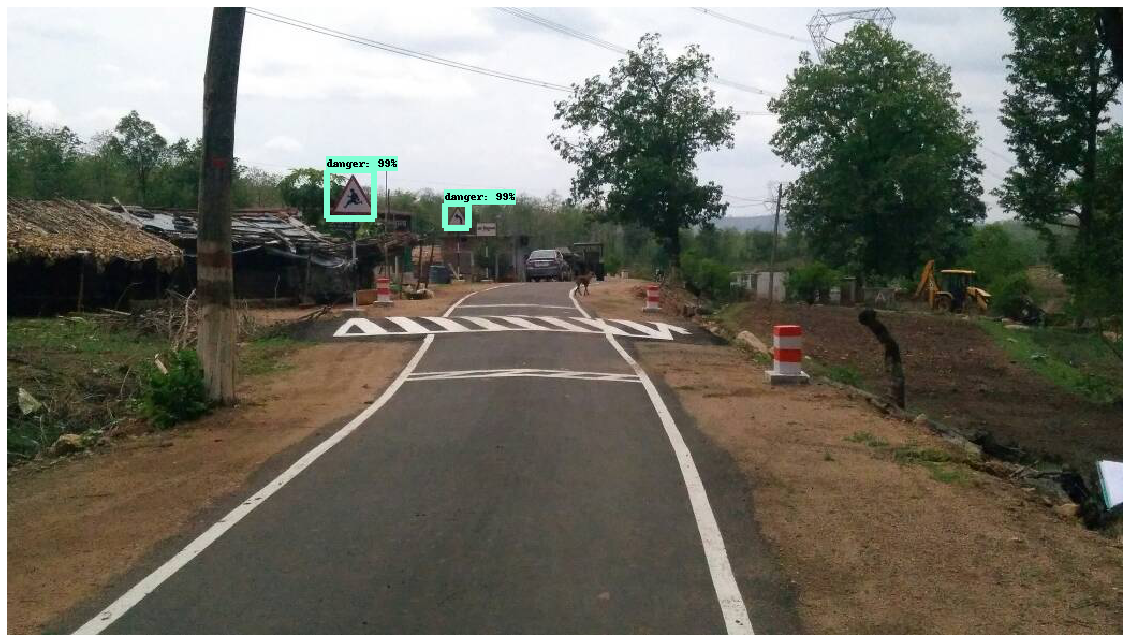

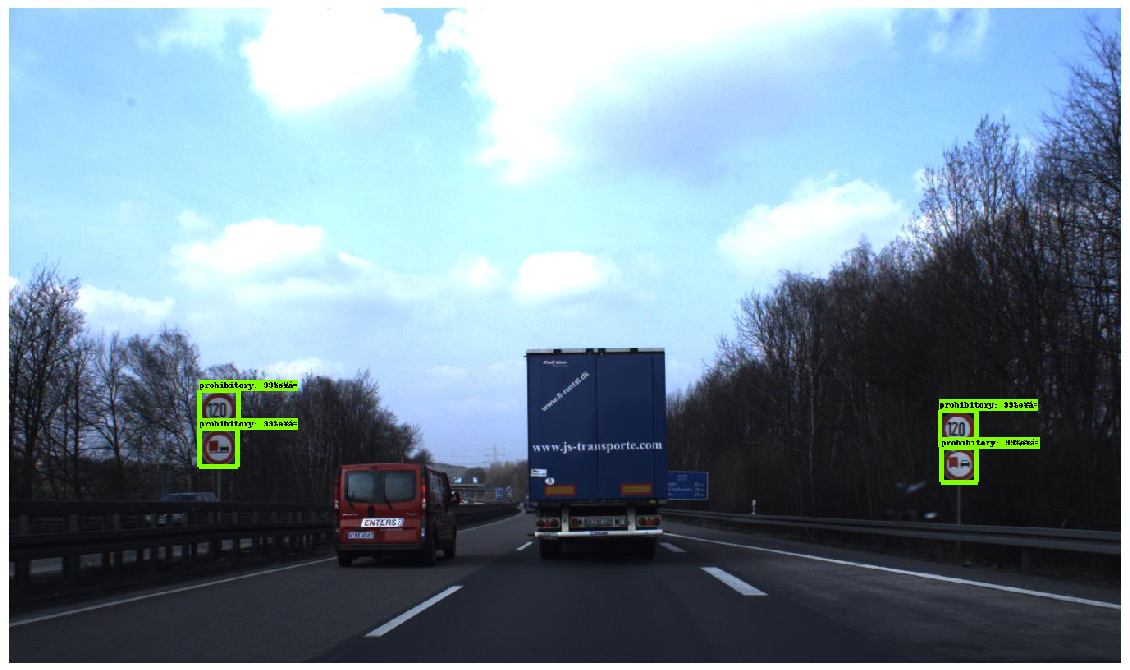

In [0]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for idx, image_path in enumerate(TEST_IMAGE_PATHS):
            image = Image.open(image_path)
            
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Each box represents a part of the image where a particular object was detected.
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            # Actual detection.
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=6)
            plt.figure(idx, figsize=IMAGE_SIZE)
            plt.axis('off')
            plt.imshow(image_np)

In [0]:
TEST_IMAGE_PATHS

[]